In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [19]:
df_US = df[df['job_country']=='United States'].copy()

In [21]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


In [32]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns = 'job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [34]:
df_US_pivot.reset_index(inplace=True)   # resetting index so that we have a normal index column with integers (rather than month)

In [36]:
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B')

df_US_pivot['month_no']

0    1900-04-01
1    1900-08-01
2    1900-12-01
3    1900-02-01
4    1900-01-01
5    1900-07-01
6    1900-06-01
7    1900-03-01
8    1900-05-01
9    1900-11-01
10   1900-10-01
11   1900-09-01
Name: month_no, dtype: datetime64[ns]

In [38]:
# accessing the month in the dates

df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month

df_US_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [41]:
df_US_pivot.sort_values('month_no', inplace=True)

df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [46]:
df_US_pivot.set_index('job_posted_month', inplace=True)

In [44]:
df_US_pivot.drop(columns='month_no', inplace = True)

In [47]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

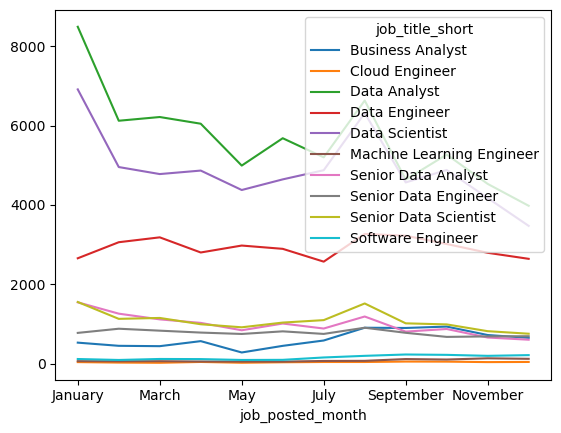

In [48]:
df_US_pivot.plot(kind='line')

In [67]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

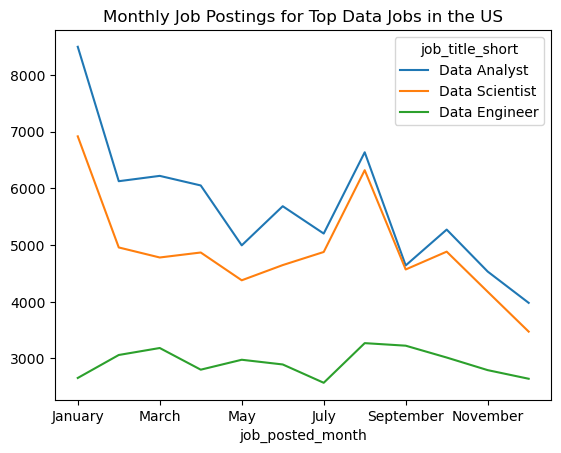

In [73]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel='2023'
plt.ylabel='Job Count'
plt.show()